## For each of the six machines, compute and report the expected utility of the products of that machine.

In [51]:
six_machines = samples_hierarchical["ypred_all"]
utilities_six_machines = (sum(six_machines >= 85) * 200 - len(six_machines)* 100)/len(six_machines)

print("==Expected utility of the products of six machinee.==")
for i in range(len(utilities_six_machines)):
    print("{}th machine's Expected utility of the products: €{:.2f}".format(i+1, utilities_six_machines[i]))


==Expected utility of the products of six machinee.==
1th machine's Expected utility of the products: €-21.20
2th machine's Expected utility of the products: €74.05
3th machine's Expected utility of the products: €21.70
4th machine's Expected utility of the products: €79.00
5th machine's Expected utility of the products: €28.90
6th machine's Expected utility of the products: €13.45


## Rank the machines based on the expected utilities and explain briefly what these values tell about the quality of these machines. E.g. Tell which machines are profitable and which are not (if any).

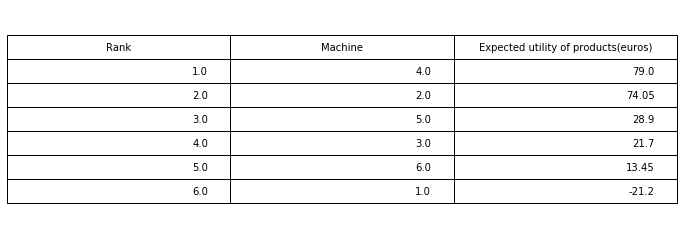

In [54]:
collabel=("Rank", "Machine", "Expected utility of products(euros)")
the_table = plt.table(cellText=table_values,colLabels=collabel,loc='center')
the_table.set_fontsize(24)
the_table.scale(2, 2)
# the_table.scale(2,4)
plt.axis('off')
plt.show()

## Compute and report the expected utility of the products of a new (7th) machine.

In [56]:
seventh_machine = samples_hierarchical["ypred7"]
utilities_seventh_machine = (sum(seventh_machine >= 85) * 200 - len(seventh_machine)* 100)/len(seventh_machine)

print("==Expected utility of the products of 7th machine.==")
print("7th machine's Expected utility of the products: €{:.2f}".format(utilities_seventh_machine))

==Expected utility of the products of 7th machine.==
7th machine's Expected utility of the products: €32.30


## Based on your analysis, discuss briefly whether the company owner should buy a new (7th) machine.

The expected utility of products is €32.30 which generates profit. Thus the owner should buy a new one. 

# Appendix

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns

from scipy.stats import distributions

import pickle

# add utilities directory to path
import os, sys
util_path = os.path.abspath('utilities_and_data')
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import stan_utility
import stan_helper

import pystan
from IPython.display import Image

In [4]:
def get_stan_model(model_name, model_code, get_new=False):
    path = os.path.abspath(os.path.join(os.path.curdir, model_name))

    if not get_new and os.path.exists(path):
        print("Model exists already! Returning pickle.")
        return pickle.load(open(path, 'rb'))
    
    print("Path doesn't exist. Compiling model. It might take few minutes...")
    import pystan
    sm = pystan.StanModel(model_code=model_code)
    with open(model_name, 'wb') as f:
        pickle.dump(sm, f)
    return sm


Load model

In [5]:
d = np.loadtxt("factory.txt")

In [42]:
x = np.tile(np.arange(1, 7), d.shape[0])
y = d.ravel();y
N = len(x)
data = dict(
    N = N,
    K = 6,  # 6 machines
    x = x,  # group indicators
    y = y,   # observations
    target_machine = 6  # 6th machine
)
print(x.shape,y.shape,N)

(30,) (30,) 30


In [43]:
#  Comparison of k groups with common variance and
#  hierarchical prior for the mean

data_code = '''
data {
    int<lower=0> N; // number of data points
    int<lower=0> K; // number of groups
    int<lower=1,upper=K> x[N]; // group indicator
    vector[N] y; //
    int<lower=0> target_machine;
}
parameters {
    real<lower=70, upper=110> mu0; // uniform prior mean
    real<lower=0, upper=20> sigma0; // uniform prior std
    vector[K] mu;         // group means
    real<lower=0> sigma;  // common std
}
model {
  mu ~ normal(mu0, sigma0); // population prior with unknown parameters
  y ~ normal(mu[x], sigma);
}
generated quantities {
  real mu7;
  real ypred7;
  vector[6] ypred_all;
  mu7 = normal_rng(mu0,sigma0);
  ypred7 = normal_rng(mu7, sigma);
  
  for (i in 1:6)
    ypred_all[i] = normal_rng(mu[i], sigma);
}
'''

In [44]:
sm_hierarchical =  get_stan_model("factory_hierarchical_posterior", data_code, get_new=True)
# sm_hierarchical =  get_stan_model("factory_hierarchical_posterior", data_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_682e889ac9e4267f688ef3619eedf005 NOW.


Path doesn't exist. Compiling model. It might take few minutes...


In [45]:
# fit_hierarchical = sm_hierarchical.sampling(data=data, seed=194838, chains=10, iter=4000);fit_hierarchical
fit_hierarchical = sm_hierarchical.sampling(data=data, seed=194838);fit_hierarchical

Inference for Stan model: anon_model_682e889ac9e4267f688ef3619eedf005.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu0           92.82    0.11   5.83  80.46  89.25  92.84  96.48 104.86   2582    1.0
sigma0        12.24    0.17   4.08   3.87   9.36  12.23  15.37  19.49    590    1.0
mu[0]         80.85    0.18   6.51   68.4  76.48  80.65  85.19  93.74   1379    1.0
mu[1]        102.43    0.14   6.46  89.71  98.17 102.38 106.68 115.19   2018    1.0
mu[2]         89.18    0.11    6.1  76.85  85.22  89.22  93.12 101.21   2835    1.0
mu[3]        106.13     0.2   6.74  93.18 101.81  106.2 110.62 119.31   1119    1.0
mu[4]         90.82    0.11   5.85  79.55  87.06  90.76  94.62 102.83   2741    1.0
mu[5]         87.86    0.11   6.14  75.64  83.81  88.02  91.99   99.4   2999    1.0
sigma         15.31    0.06   2.43  11.45  13.58  15.06

In [47]:
# Extract samples in different forms for different parameters.
# permuted : bool
#    If True, returned samples are permuted. All chains are
#    merged and warmup samples are discarded.
samples_hierarchical = fit_hierarchical.extract(permuted=True)


## For each of the six machines, compute and report the expected utility of the products of that machine.

In [51]:
six_machines = samples_hierarchical["ypred_all"]
utilities_six_machines = (sum(six_machines >= 85) * 200 - len(six_machines)* 100)/len(six_machines)

print("==Expected utility of the products of six machinee.==")
for i in range(len(utilities_six_machines)):
    print("{}th machine's Expected utility of the products: €{:.2f}".format(i+1, utilities_six_machines[i]))


==Expected utility of the products of six machinee.==
1th machine's Expected utility of the products: €-21.20
2th machine's Expected utility of the products: €74.05
3th machine's Expected utility of the products: €21.70
4th machine's Expected utility of the products: €79.00
5th machine's Expected utility of the products: €28.90
6th machine's Expected utility of the products: €13.45


In [52]:
# np.fromiter(np.ndenumerate(utilities_six_machines), np.float)
s = np.array(list(enumerate(utilities_six_machines)))#.sort(axis=1)
s[:,0] += 1
s = s[np.argsort(s[:, 1])[::-1]];s

array([[  4.  ,  79.  ],
       [  2.  ,  74.05],
       [  5.  ,  28.9 ],
       [  3.  ,  21.7 ],
       [  6.  ,  13.45],
       [  1.  , -21.2 ]])

In [53]:
table_values = np.insert(s, [0], [[i] for i in list(range(1,7))], axis=1)

## Rank the machines based on the expected utilities and explain briefly what these values tell about the quality of these machines. E.g. Tell which machines are profitable and which are not (if any).

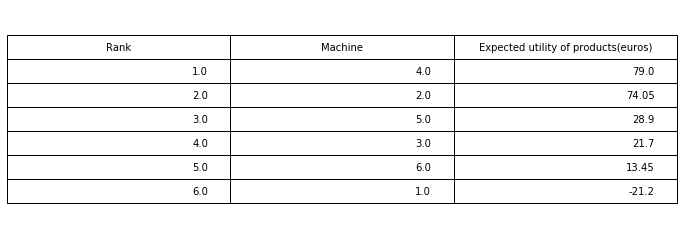

In [54]:
collabel=("Rank", "Machine", "Expected utility of products(euros)")
the_table = plt.table(cellText=table_values,colLabels=collabel,loc='center')
the_table.set_fontsize(24)
the_table.scale(2, 2)
# the_table.scale(2,4)
plt.axis('off')
plt.show()

## Compute and report the expected utility of the products of a new (7th) machine.

In [56]:
seventh_machine = samples_hierarchical["ypred7"]
utilities_seventh_machine = (sum(seventh_machine >= 85) * 200 - len(seventh_machine)* 100)/len(seventh_machine)

print("==Expected utility of the products of 7th machine.==")
print("7th machine's Expected utility of the products: €{:.2f}".format(utilities_seventh_machine))

==Expected utility of the products of 7th machine.==
7th machine's Expected utility of the products: €32.30


## Based on your analysis, discuss briefly whether the company owner should buy a new (7th) machine.

The expected utility of products is €32.30 which generates profit. Thus the owner should buy a new one. 